# **Banking Dataset / Projecte de Subscripcions Bancàries**

# Exploratory Data Analysis (EDA) Template 


### Importació de Biblioteques

In [1]:
import sys
sys.prefix


'C:\\Users\\Buba\\anaconda3'

In [2]:
import pandas as pd

C:\Users\Buba\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Buba\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
!pip install sweetviz
import sweetviz as sv

     ---------------------------------------- 15.1/15.1 MB 2.2 MB/s eta 0:00:00


In [24]:
import os
import pandas as pd

# Set the working directory
os.chdir("C:/Users/Buba/Documents/CURSOS-PROGRAMACION/IT-Academy/Upskilling-ML-negoci/ML_BankingDataset")

# Verify the working directory
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\Buba\Documents\CURSOS-PROGRAMACION\IT-Academy\Upskilling-ML-negoci\ML_BankingDataset


### Carregar el dataset situat a la mateixa carpeta que els Jupyter Notebooks del projecte

In [11]:
# Load the dataset
data_raw = pd.read_csv('bank_dataset.CSV')

# Display basic information about the dataset
print(f"Dataset loaded: {data_raw.shape[0]} rows, {data_raw.shape[1]} columns")

Dataset loaded: 11162 rows, 17 columns


### Mostra les primeres files del dataset

In [12]:
data_raw

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [13]:
# Mostra les primeres files del dataset
data_raw.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Informació general del dataset

In [14]:
# Informació general del dataset

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


### Descripció estadística del dataset

In [15]:
# Descripció estadística del dataset
data_raw.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


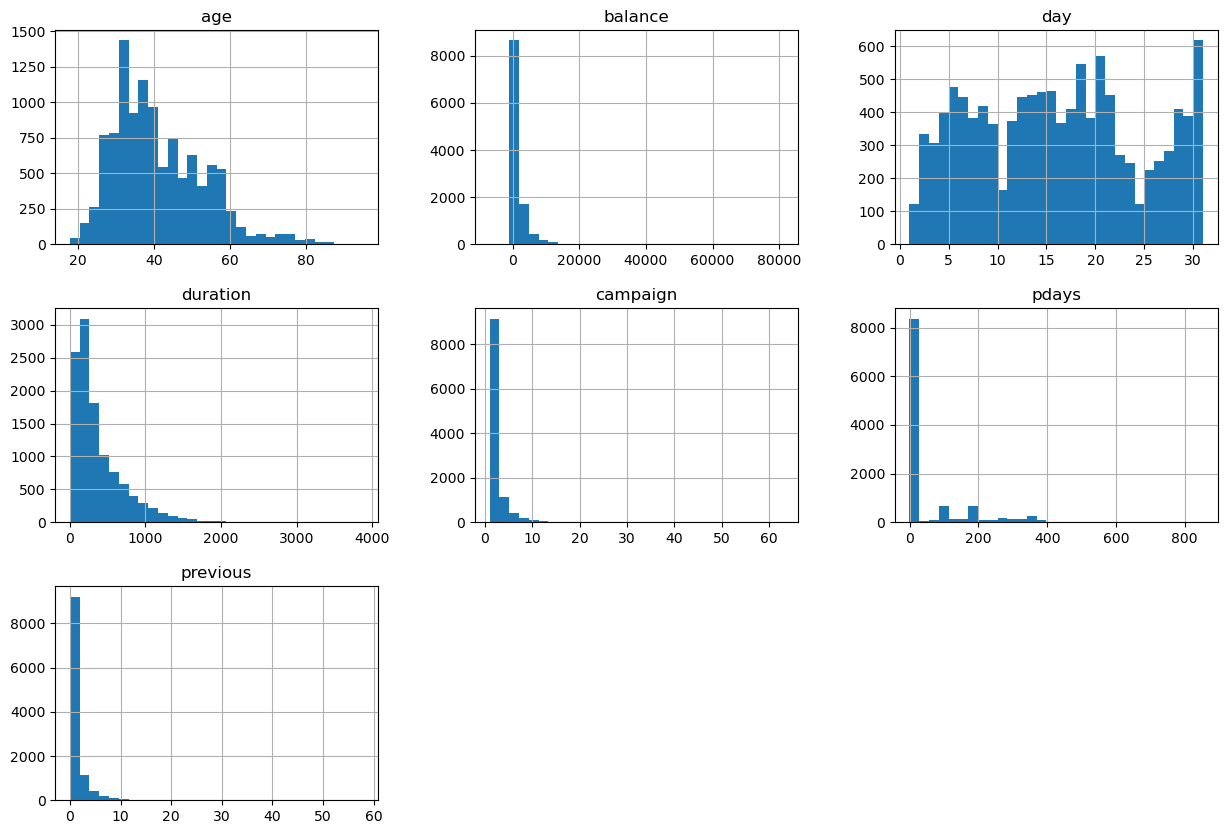

In [16]:
# Histograma de cada variable numèrica
data_raw.hist(bins=30, figsize=(15, 10))
plt.show()

### Comptar els valors de cada variable categòrica

In [17]:
# Definimos las columnas de variables categóricas

data_raw.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [18]:
# Comptar els valors de cada variable categòrica
for column in data_raw.select_dtypes(include=['object']).columns:
 print(data_raw[column].value_counts(), "\n")

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64 

marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64 

education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64 

default
no     10994
yes      168
Name: count, dtype: int64 

housing
no     5881
yes    5281
Name: count, dtype: int64 

loan
no     9702
yes    1460
Name: count, dtype: int64 

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64 

month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64 

poutcome
unknown    8326
failure    1228
success    1071
oth

### Comptar valors nuls per columna

In [19]:
# Comptar valors nuls per columna
data_raw.isnull().sum() | data_raw.isna().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

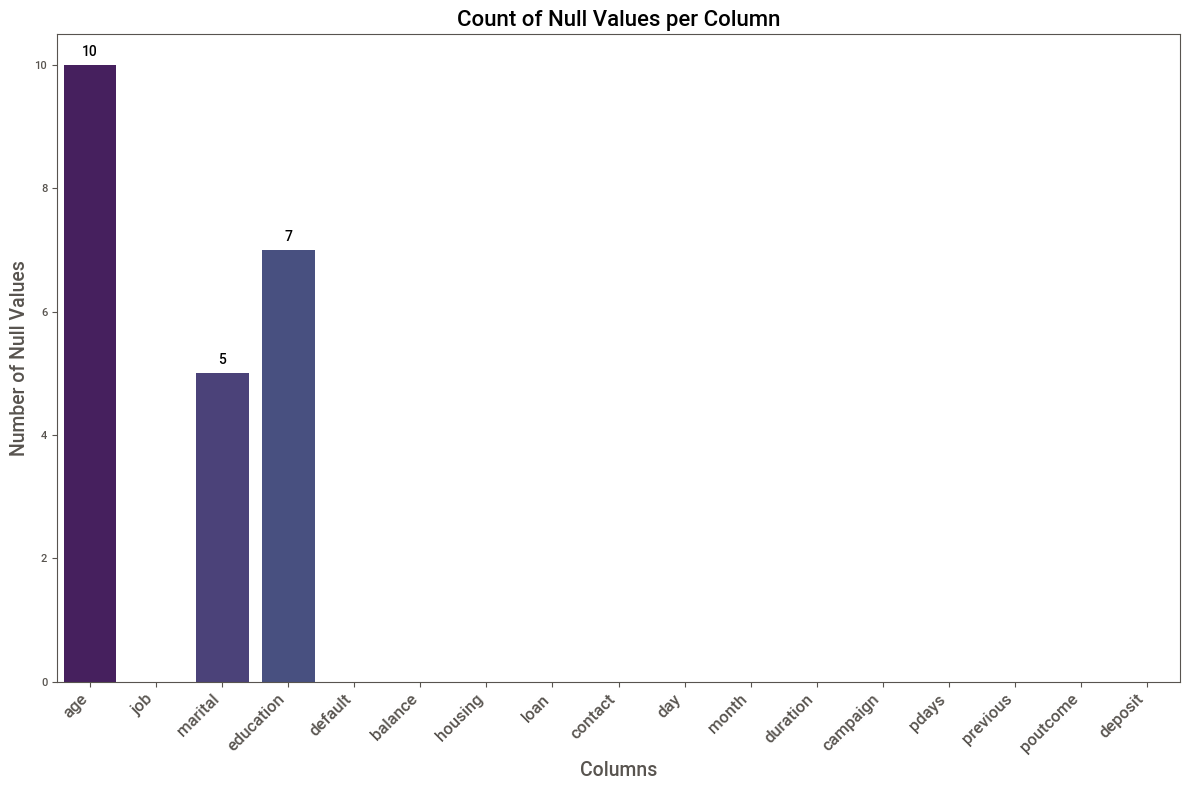

In [23]:
# Count null values per column
null_counts = data_raw.isnull().sum()| data_raw.isna().sum()

# Filter columns with non-zero nulls
columns_with_nulls = null_counts[null_counts > 0]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(
    x=null_counts.index,
    y=null_counts.values,
    palette="viridis"
)

# Annotate non-zero null counts above each bar
for idx, value in enumerate(null_counts):
    if value > 0:
        plt.text(
            x=idx,  # X-coordinate
            y=value + 0.1,  # Slightly above the bar
            s=f"{value}",  # Text to display
            ha="center", 
            va="bottom",
            fontsize=10, 
            color="black"
        )

# Adding aesthetics
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.title("Count of Null Values per Column", fontsize=16)
plt.ylabel("Number of Null Values", fontsize=14)
plt.xlabel("Columns", fontsize=14)
plt.tight_layout()

# Show plot
plt.show()

### EDA automàtic amb Sweetviz

In [21]:
# EDA automàtic amb Sweetviz
report = sv.analyze(data_raw)
report.show_html('EDA_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\Users\Buba\AppData\Local\Temp\ipykernel_19576\802597891.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = outlier_percentages[idx]


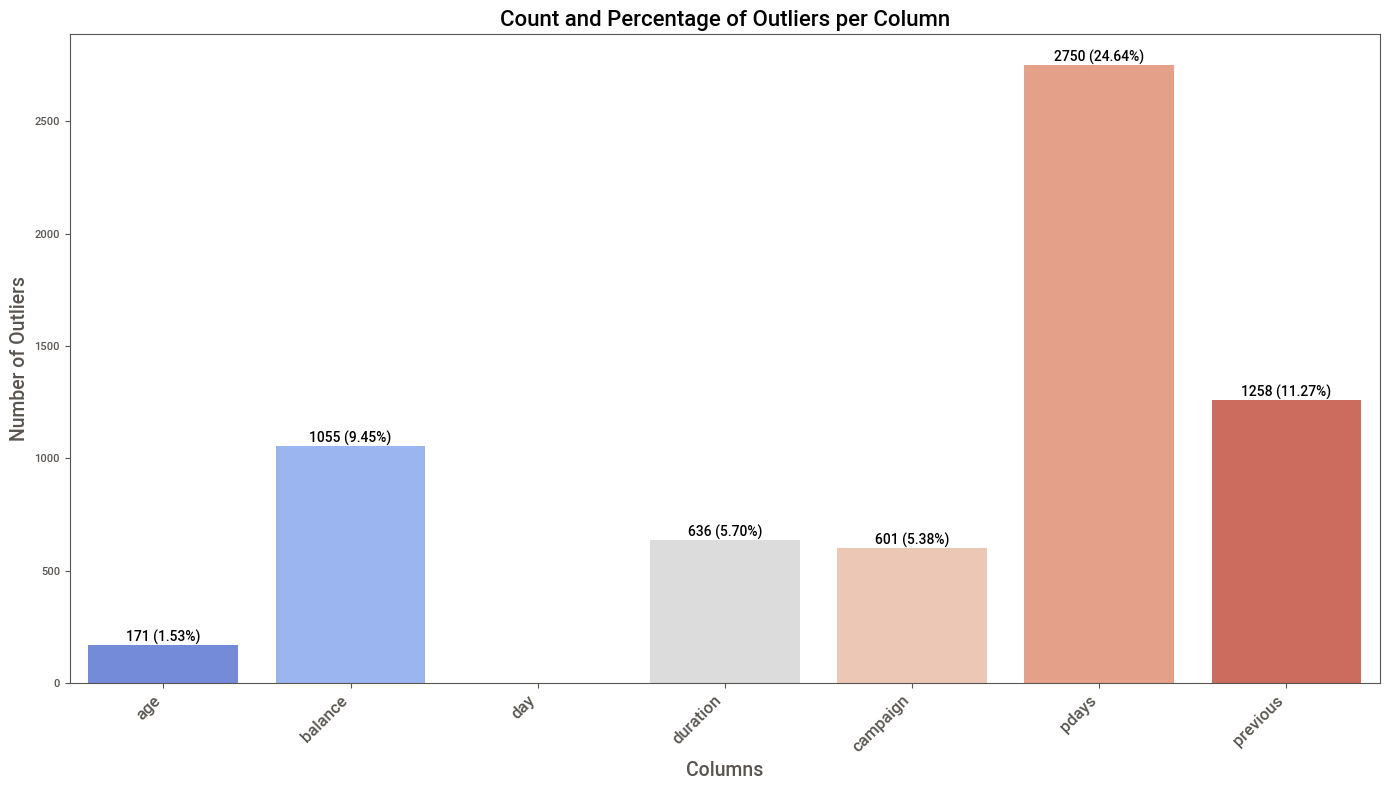

In [27]:
import numpy as np

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    outliers = {}
    for col in data.select_dtypes(include=[np.number]):  # Only numeric columns
        Q1 = np.percentile(data[col].dropna(), 25)  # First quartile
        Q3 = np.percentile(data[col].dropna(), 75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outlier_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
        outliers[col] = outlier_mask.sum()  # Count outliers
    return outliers

# Detect outliers
outliers_dict = detect_outliers_iqr(data_raw)

# Convert to Series for easier plotting
outliers_series = pd.Series(outliers_dict)

# Calculate percentages
total_observations = len(data_raw)
outlier_percentages = (outliers_series / total_observations) * 100

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(
    x=outliers_series.index,
    y=outliers_series.values,
    palette="coolwarm"
)

# Annotate bars with counts and percentages
for idx, value in enumerate(outliers_series):
    if value > 0:
        percentage = outlier_percentages[idx]
        plt.text(
            x=idx,
            y=value + 0.1,
            s=f"{value} ({percentage:.2f}%)",
            ha="center", 
            va="bottom",
            fontsize=10,
            color="black"
        )

# Adding aesthetics
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.title("Count and Percentage of Outliers per Column", fontsize=16)
plt.ylabel("Number of Outliers", fontsize=14)
plt.xlabel("Columns", fontsize=14)
plt.tight_layout()

# Show plot
plt.show()


In [28]:
# Boxplot for numeric columns with outliers
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=data_raw.select_dtypes(include=[np.number]),
    palette="coolwarm",
    orient="h",  # Horizontal boxplots
    flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5}
)

# Adding aesthetics
plt.title("Boxplots of Numeric Variables with Outliers", fontsize=16)
plt.xlabel("Values", fontsize=14)
plt.ylabel("Columns", fontsize=14)
plt.tight_layout()

# Show plot
plt.show()


AttributeError: 'DataFrame' object has no attribute 'iteritems'

<Figure size 1400x800 with 0 Axes>

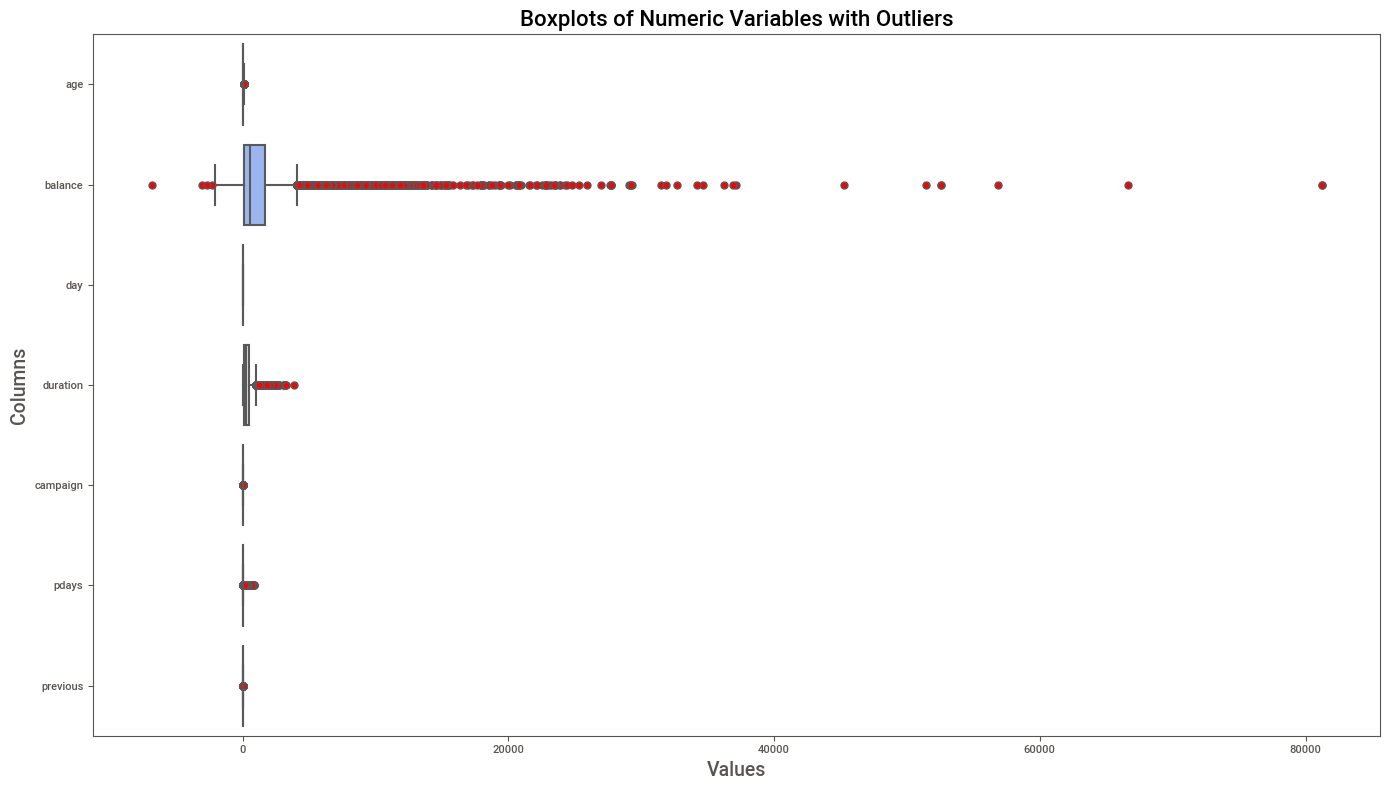

In [29]:
# Melt the DataFrame to long format
numeric_data = data_raw.select_dtypes(include=[np.number])
melted_data = numeric_data.reset_index().melt(id_vars=["index"], var_name="Variable", value_name="Value")

# Plot boxplots
plt.figure(figsize=(14, 8))
sns.boxplot(
    x="Value",
    y="Variable",
    data=melted_data,
    palette="coolwarm",
    flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5},
    orient="h"
)

# Adding aesthetics
plt.title("Boxplots of Numeric Variables with Outliers", fontsize=16)
plt.xlabel("Values", fontsize=14)
plt.ylabel("Columns", fontsize=14)
plt.tight_layout()

# Show plot
plt.show()


## Exportar i guardar Notebook .ipynb a una carpeta

In [30]:
import os

# Save current notebook name
notebook_name = "BankingDataset_step2-EDA.ipynb"
save_path = os.path.join(os.getcwd(), notebook_name)

# Verify save path
if os.path.exists(save_path):
    print(f"Notebook saved at: {save_path}")
else:
    print(f"Notebook needs saving. Save Note manually to: {save_path}")


Notebook saved at: C:\Users\Buba\Documents\CURSOS-PROGRAMACION\IT-Academy\Upskilling-ML-negoci\ML_BankingDataset\BankingDataset_step2-EDA.ipynb


In [31]:
import shutil
import os

# Set the target directory and notebook name
notebook_name = "BankingDataset_step3-EDA.ipynb"
source_path = os.path.join(os.getcwd(), notebook_name)  # Current notebook path
target_path = r"C:\Users\Buba\Documents\CURSOS-PROGRAMACION\IT-Academy\Upskilling-ML-negoci\ML_BankingDataset"  # Target folder path
target_notebook_path = os.path.join(target_path, notebook_name)

# Move the notebook to the target directory
shutil.move(source_path, target_notebook_path)

print(f"Notebook saved at: {target_notebook_path}")


Notebook saved at: C:\Users\Buba\Documents\CURSOS-PROGRAMACION\IT-Academy\Upskilling-ML-negoci\ML_BankingDataset\BankingDataset_step3-EDA.ipynb
